# Emulation Exercises

Imagine you want to build a real duckiebot. Instead of plotting the changes a certain controller made to your system, you want to check the results by racing your duckiebot in your room.

This exercise will prepare you for exactly that scenario. Also in Control Systems the real world differs from the theoretical one. In real life, as seen in your lecture, you have to work in descrete time due to a fundamental problem: *"Computers can't do limit operations, hence they can't calculate derivatives exactly. Aprroximations are required. Instead of differential equations, finite difference equations are solved."*



-----------
## Installation 
We use the [Python library](https://python-control.readthedocs.io/en/0.9.3.post2/) `control`, which can be installed using `pip`. If you have no experience with Python, try to do some tutorials (e.g. check [this](https://docs.python.org/3/tutorial/) one). The same goes for installing Python packages using `pip`, see this [tutorial](https://packaging.python.org/en/latest/tutorials/installing-packages/). There are plenty of other Python tutorials for beginners if you do a Google/YouTube search. 

In [718]:
# Install the required python library with pip 
!pip install control


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


------
## Python Packages
We use the following Python libraries which need to be imported. If you have no experience with the [NumPy](https://numpy.org/) library, read the documentation and do some tutorials. It is very important for matrix operations in Python.

In [719]:
# Import the required python libraries
from typing import Optional, List
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import control as ct

## System Library

In here you will find different systems that show the advatages and disadvantages for the three discretization methods.

In [720]:
# Euler forward example
def create_system1():
    A = np.array([[-2, 0],
                 [0, -3]])
    B = np.array([[0],
                 [1]])
    C = np.array([[1, 1]])
    D = np.array([[0]])
    return ct.StateSpace(A, B, C, D)

# Euler backwards example
def create_system2():
    A = np.array([[0, 0],
                 [0, -0.01]])
    B = np.array([[0],
                 [1]])
    C = np.array([[1, 1]])
    D = np.array([[0]])
    return ct.StateSpace(A, B, C, D)

#Create your own system here
def create_system3():
    A = np.array([[0, 0],
                 [0, 0]])
    B = np.array([[0],
                 [0]])
    C = np.array([[0, 0]])
    D = np.array([[0]])
    return ct.StateSpace(A, B, C, D)

#usage
system1 = create_system1()
system2 = create_system2()
system3 = create_system3()
    

-------
## Implementation of Descretization Methods

### Euler Forward Method


In [721]:
def euler_forward(system, dt):
    """
    Discretize a continuous-time system using the Euler forward method.

    Parameters:
    system: State-space system (instance of ct.StateSpace).
    dt: Time step for discretization.

    Returns:
    StateSpace(Ad, Bd, Cd, Dd): Discretized state-space matrices.
    """
    A, B, C, D = system.A, system.B, system.C, system.D
    I = np.eye(A.shape[0])
    Ad = I + dt * A
    Bd = dt * B
    Cd = C
    Dd = D
    return ct.StateSpace(Ad, Bd, Cd, Dd)

### Euler Backwards Method

In [722]:
def euler_backward(system, dt):
    """
    Discretize a continuous-time system using the Euler backward method.

    Parameters:
    system: State-space system (instance of ct.StateSpace).
    dt: Time step for discretization.

    Returns:
    StateSpace(Ad, Bd, Cd, Dd): Discretized state-space matrices.
    """
    A, B, C, D = system.A, system.B, system.C, system.D
    I = np.eye(A.shape[0])
    Ad = np.linalg.inv(I - dt * A)
    Bd = np.dot(Ad, dt * B)
    Cd = C
    Dd = D
    return ct.StateSpace(Ad, Bd, Cd, Dd)

### Tustin's Method

In [723]:
def tustin_method(system, dt):
    """
    Discretize a continuous-time system using Tustin's method (bilinear transformation).
    
    Parameters:
    system: State-space system (instance of ct.StateSpace).
    dt: Time step for discretization.
    
    Returns:
    StateSpace(Ad, Bd, Cd, Dd): Discretized state-space matrices.
    """
    A, B, C, D = system.A, system.B, system.C, system.D
    I = np.eye(A.shape[0])
    pre_matrix = np.linalg.inv(I - (dt / 2) * A)
    Ad = np.dot(pre_matrix, I + (dt / 2) * A)
    Bd = np.dot(pre_matrix, dt * B)
    Cd = C
    Dd = D
    return ct.StateSpace(Ad, Bd, Cd, Dd)


---------
## Console

This is where you cange your system (eg. system1, system2, etc.) and vary the step time. Leave it as it is for exercises 1 and 2.

In [724]:
#change for exercise 3
dt =  1.0 # Time step
test = system1

-------
## Exercise 1: Stability Analysis with Eigenvalue Plots

Objective: Analyze and compare the stability of the Duckiebot steering system using different discretization methods.

Tasks:

	1.Create a fuction that discretizes the system using Euler forward, Euler backward, and Tustin’s methods for a given time step (dt = 1 seconds).

	2.Calculate the eigenvalues in the plot_eigenvalues() function.
	
	3.Use the provided plot_table function as well as the prior ones from task 1 and 2 to plot the eigenvalues in the complex plain and check them for stability. Hint: Stable systems will have eigenvalues with magnitudes less than 1.

### Solution Exercise 1

#### Task 1

In [725]:
def discretize(system, dt):
    '''
    Discretizes a continuous-time system into discrete-time systems using three methods: 
    Euler Forward, Euler Backward, and Tustin's method.

    Parameters:
    system: A continuous-time system represented as a ct.StateSpace object.
    dt: Time step for discretization.

    Returns:
    tuple: A tuple of discretized systems (dt_forward, dt_backward, dt_tustin), each representing 
    the input system discretized using Euler Forward, Euler Backward, and Tustin's method, respectively.
    '''
    # Discretize using each method
    dt_forward = euler_forward(system, dt)
    dt_backward = euler_backward(system, dt)
    dt_tustin = tustin_method(system, dt)
    
    return dt_forward, dt_backward, dt_tustin

#### Task 2

In [726]:
def plot_eigenvalues(system, method_name):
    '''
    Plots the eigenvalues of the discretized system's A matrix on the complex plane.

    Parameters:
    system: A discrete-time system, represented as a control.statesp.StateSpace object, 
            whose eigenvalues are to be plotted.
    method_name: A string representing the name of the discretization method used for 
                 this system. This name is used as a label in the plot.

    The function calculates the eigenvalues of the system's A matrix, prints them,
    and plots them on the complex plane. Each set of eigenvalues is labeled according 
    to the discretization method used.
    '''
    Ad = system.A
    eigenvalues = np.linalg.eigvals(Ad)
    print(method_name)
    print(eigenvalues)
    plt.scatter(eigenvalues.real, eigenvalues.imag, label=method_name)

#### Plotting function

In [727]:
def plot_table(dt_forward, dt_backward, dt_tustin):
    '''
    Plots the eigenvalues of three discretized systems on the complex plane to compare their stability.

    Parameters:
    dt_forward: Discretized system using the Euler Forward method (StateSpace object).
    dt_backward: Discretized system using the Euler Backward method (StateSpace object).
    dt_tustin: Discretized system using Tustin's method (StateSpace object).

    This function visualizes the eigenvalues of the given discretized systems on the complex plane.
    It helps in comparing the stability characteristics of the systems discretized using different methods.
    The function plots each set of eigenvalues with a different label corresponding to the discretization method.
    It also includes a unit circle for reference, aiding in the assessment of stability (eigenvalues inside the 
    unit circle indicate stability in discrete-time systems).
    '''
    plt.figure(figsize=(8, 6))
    
    plot_eigenvalues(dt_forward, 'Euler Forward')
    plot_eigenvalues(dt_backward, 'Euler Backward')
    plot_eigenvalues(dt_tustin, 'Tustin')
    
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.xlabel('Real Part')
    plt.ylabel('Imaginary Part')
    plt.title('Eigenvalues of Discretized Systems')
    plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1.15))
    plt.grid(True)

    # adding unit circle for visualisation
    theta = np.linspace(0, 2 * np.pi, 100)  # 100 points between 0 and 2*pi
    x = np.cos(theta)  # x coordinates on the circle
    y = np.sin(theta)  # y coordinates on the circle
    plt.plot(x, y, linestyle = '--', color = 'grey')

    plt.show()

#### Task 3 - Implementation

Eigenvalues of continous system:
[-2. -3.]
Euler Forward
[-1. -2.]
Euler Backward
[0.33333333 0.25      ]
Tustin
[ 0.  -0.2]


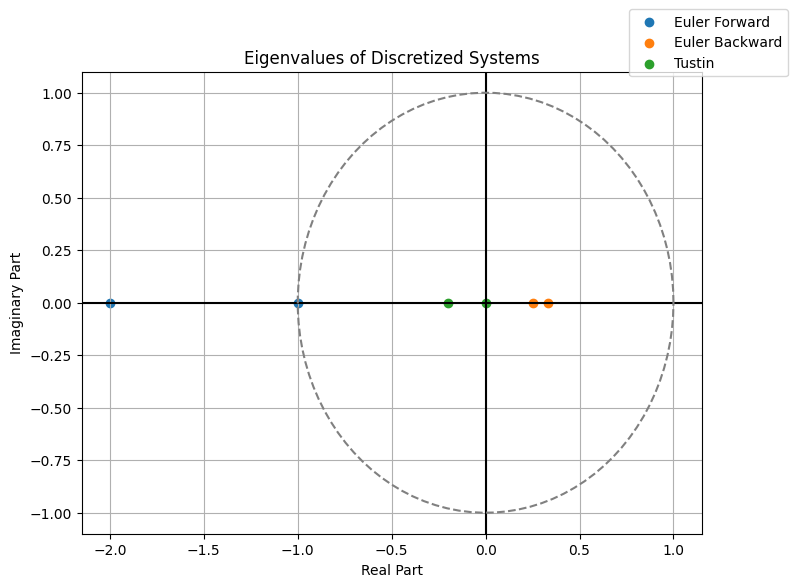

In [728]:
#eigenvalues in c.t. for comparison
print("Eigenvalues of continous system:")
print(np.linalg.eigvals(test.A))

#implement your code here
#------------

dt_forward, dt_backward, dt_tustin = discretize(test, dt)
plot_table(dt_forward, dt_backward, dt_tustin)

#------------

### Conclusion of Exercise 1

In this exercise, we conducted a thorough stability analysis of the Duckiebot steering system using various discretization methods. By employing Euler forward, Euler backward, and Tustin’s methods to discretize the system for a given time step (dt = 1 second), we could observe the distinct impacts these methods have on system stability.

The eigenvalues of the discretized systems were calculated and visually plotted on the complex plane. This visualization, facilitated by the unit circle on the plot, was instrumental in determining the stability of the systems. Systems with eigenvalues lying inside the unit circle are deemed stable in the discrete-time domain.

A key observation from this exercise is the critical role of the discretization method in system stability. Notably, the Euler Forward method often presents a risk of making a stable continuous-time system unstable in the discrete-time domain. This is particularly true for systems with eigenvalues close to the stability boundary. Therefore, careful consideration is required when selecting this method, underscoring the need for a rigorous stability check post-discretization.

This analysis highlights the importance of not only choosing the appropriate discretization method but also thoroughly checking the resulting system's stability, especially when employing the Euler Forward method. Such diligence is crucial in ensuring the reliability and accuracy of digital control systems, particularly in applications where precise control and stability are paramount.

#### Observability check

In [729]:
#check for observability
print(dt_backward)
print(dt_forward)
print(dt_tustin)

A = [[0.33333333 0.        ]
     [0.         0.25      ]]

B = [[0.  ]
     [0.25]]

C = [[1. 1.]]

D = [[0.]]

A = [[-1.  0.]
     [ 0. -2.]]

B = [[0.]
     [1.]]

C = [[1. 1.]]

D = [[0.]]

A = [[ 0.   0. ]
     [ 0.  -0.2]]

B = [[0. ]
     [0.4]]

C = [[1. 1.]]

D = [[0.]]



## Exercise 2: Step Response Simulation and Comparison

Objective: Simulate and compare the step responses of the discretized systems.

Tasks:

	1.Apply a step input to each discretized system.
	2.Simulate the response over a fixed time period (100 seconds).
	3.Plot the responses from all three methods on the same graph for comparison.

### Solution Exercise 2

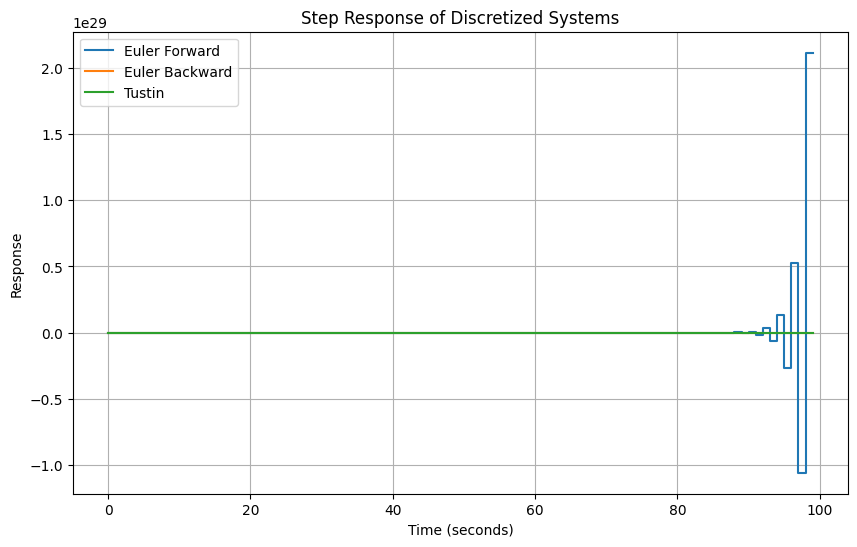

In [730]:
#system 1 (Forward)
def simulate_step_response(system, dt, label, n=100):
    lti = signal.dlti(system.A, system.B, system.C, system.D, dt=dt)
    t, y = signal.dstep(lti, n=n)
    plt.step(t, np.squeeze(y), label=label)

plt.figure(figsize=(10, 6))

# Simulate step response for each method
simulate_step_response(dt_forward, dt, label='Euler Forward')
simulate_step_response(dt_backward, dt, label='Euler Backward')
simulate_step_response(dt_tustin, dt, label='Tustin')

plt.xlabel('Time (seconds)')
plt.ylabel('Response')
plt.title('Step Response of Discretized Systems')
plt.legend()
plt.grid(True)
plt.show()

### Conclusion Exercise 3

## Exercise 3: Performance Analysis under Varying Time Steps

Objective: Evaluate how the choice of time step affects the performance of each discretization method.

Tasks:

	1.Vary the time step (e.g., dt = 0.75, 0.5).
	2.Simulate the step response for each case.
	3.Plot the responses for different time steps and compare how each method reacts to changes in the time step.
	4.Find the biggest time step that makes the system become stable for all approximation methods.
	5.Why does it make sense that the system becomes stable for all approximation methods with a smaller time step?

### Conclusion Exercise 3

In this exercise, we investigated the effect of varying the time step *dt* on the stability of a system discretized using different methods. Our analysis revealed that the largest time step at which the system remains stable is *dt=0.66*. This observation is pivotal in understanding the dynamics of discretization methods and their relationship with time step size.

The key takeaway here is the significance of the time step in determining the accuracy and stability of the discretized system. Smaller time steps lead to a system behavior that more closely approximates the original continuous-time system. Remember, system1 is stable in continuous time. This is because, with smaller increments, the discrete model captures the system's dynamics more frequently, hence providing a finer and more accurate representation of the continuous process. In essence, as the time step decreases, the discretized system converges towards the behavior of the continuous system, thereby enhancing stability.

Therefore, it makes sense that reducing the time step size would result in a more stable system for all discretization methods, including euler forward. This understanding is crucial when designing digital control systems or simulations, where the choice of time step can significantly impact the system's performance and reliability. The exercise underscores the delicate balance between computational efficiency (favoring larger time steps) and system fidelity (favoring smaller time steps), guiding us towards making informed decisions in system design and analysis.

## Exercise 4: Trying out different Systems

Objective: Reapeating the first three exercises and seeing different cases.

Tasks:

	1. Change system1 to system2 in the implementation cell
	2. Repeat exercises 1-3 with the new system
	Optional: You can also add your own system in the "System Library" and test it

*Hint for creating your own system: Check that your system is observable, by calculating the observaibility matrix. A non observable system will not show you the "true" step response, since it is not displayable.*
